In [184]:
from utils import *
from icp import *

In [2]:
%load_ext autoreload
%autoreload 2

#### Load data

In [3]:
xlsx_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/recorded_data.xlsx"
data = Data(xlsx_pth)
positions_FT = data.getFingertips()

#### Get real data

In [4]:
bone = 'LeftSecondFT'
frames = [5900, 6009, 6190, 6340, 6423, 7690]

touch_locations_real = get_touch_locations_real(positions_FT, bone, frames)

#### Get simulated data

In [5]:
mesh_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/035_power_drill.ply"
picked_ids = [6796, 5958, 3626, 153, 563, 4257]
touch_locations_simu, pcd = get_touch_locations_simu(mesh_pth, picked_ids=picked_ids, scale=1.)

#### Translate and rotate real points

In [6]:
Q = np.array(touch_locations_simu).T
P = np.array(touch_locations_real).T

P_values, norm_values, corresp_values, R, t = icp_svd(P, Q)

#plot_bar_values(norm_values)

In [7]:
red = [225/255, 87/255, 89/255]
orange = [242/255, 142/255, 43/255]
yellow = [237/255, 201/255, 72/255]
blue = [78/255, 121/255, 167/255]
green = [89/255, 161/255, 79/255]

In [8]:
touch_locations_real_tr = (R[0].dot(touch_locations_real.T) + t[0]).T

balls_real_tr = get_balls(touch_locations_real_tr, color=[0,1,0])
balls_simu = get_balls(touch_locations_simu)

In [9]:
line_set = get_lines(touch_locations_real_tr, touch_locations_simu)

visualize = [pcd] + balls_real_tr + balls_simu + [line_set]

o3d.visualization.draw_geometries(visualize, zoom=0.9,
                                  front=[0.0, 0.0, -0.5],
                                  lookat=[0.0, 0.0, 0.0],
                                  up=[0.0, 0.4, 0.0])

#### Translate and rotate simulated points

In [10]:
Q = np.array(touch_locations_real).T
P = np.array(touch_locations_simu).T 

P_values, norm_values, corresp_values, R, t = icp_svd(P, Q)

In [11]:
import copy

touch_locations_simu_tr = (R[0].dot(touch_locations_simu.T) + t[0]).T

balls_real = get_balls(touch_locations_real)
balls_simu_tr = get_balls(touch_locations_simu_tr, color=[0,1,0])

line_set = get_lines(touch_locations_real, touch_locations_simu_tr)

pcd_tr = copy.deepcopy(pcd)
pcd_tr.rotate(R[0], center=(0, 0, 0))
pcd_tr.translate((t[0]))

visualize = [pcd_tr] + balls_real + balls_simu_tr + [line_set]

o3d.visualization.draw_geometries(visualize)

#### Save keypoints for Minimal-IK: https://github.com/lucas-ventura/Minimal-IK

In [133]:
positions_order_l = [
    "LeftCarpus",
    "LeftSecondPP",
    "LeftSecondMP",
    "LeftSecondDP",
    "LeftThirdPP",
    "LeftThirdMP",
    "LeftThirdDP",
    "LeftFifthPP",
    "LeftFifthMP",
    "LeftFifthDP",
    "LeftFourthPP",
    "LeftFourthMP",
    "LeftFourthDP",
    "LeftFirstMC",
    "LeftFirstPP",
    "LeftFirstDP",
    "LeftSecondFT",
    "LeftThirdFT",
    "LeftFifthFT",
    "LeftFourthFT",    
    "LeftFirstFT"    
]

positions_order_r = [position.replace("Left", "Right") for position in positions_order_l]

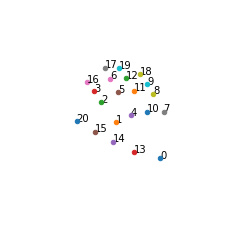

In [138]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

frame = 0

fig = plt.figure()
ax = fig.gca(projection='3d')

for i, a in enumerate(positions_order_l):
    x, y, z = positions_FT.loc[frame, a]
    
    ax.scatter(xs=x, ys=y, zs=z)
    ax.text(x, y, z, str(i), zdir=None)
    
set_axes_equal(ax)
plt.axis('off')
ax.view_init(azim=110, elev=168)


In [230]:
frame = 0

keypoints_l = np.zeros((len(positions_order_l), 3))

zero = 'LeftThirdMC'
#zero = 'LeftThirdPP'
position_zero = positions_FT.loc[frame, zero] * 1000 

for i, position in enumerate(positions_order):
    keypoints_l[i,:] = positions_FT.loc[frame, position] * 1000 - position_zero

In [231]:
frame = 0

keypoints_r = np.zeros((len(positions_order_r), 3))

zero = 'RightThirdMC'
position_zero = positions_FT.loc[frame, zero] * 1000 

for i, position in enumerate(positions_order_r):
    keypoints_r[i,:] = positions_FT.loc[frame, position] * 1000 - position_zero

In [239]:
keypoints_good = np.array([[-95.53322195,   6.1376292 ,   6.73638864],
       [ -7.69241536,  -1.18710016,  26.26170709],
       [ 21.46253033, -10.7198775 ,  27.21687341],
       [ 30.63774573, -29.50169105,  25.25336972],
       [ -1.57865789,   1.67276166,   2.76567331],
       [ 23.5806365 , -12.18996083,  -3.06957218],
       [ 30.75652446, -32.54639175,  -4.80338862],
       [-27.55583025,  -6.81872721, -35.52118432],
       [-14.18079707, -19.41488623, -41.86147505],
       [ -8.39424756, -36.39241795, -41.54591302],
       [-14.42298769,  -0.14259532, -19.94776589],
       [  7.67999418, -14.78846244, -21.35596484],
       [ 13.17217426, -37.55476823, -20.8253434 ],
       [-71.12685402, -11.53892178,  29.00818356],
       [-47.74792778, -22.81355066,  43.65746983],
       [-23.28601794, -35.47436172,  45.41063056],
       [ 35.40595816, -54.11519387,  23.04849711],
       [ 32.07109635, -58.82097813,  -4.55575451],
       [ -6.78803951, -55.9430069 , -36.2890317 ],
       [ 10.99231677, -62.27299013, -14.82436243],
       [  4.56502353, -56.89586174,  47.89368941]])

Q = np.array(keypoints_good[[0, 1,4,10,7], :]).T
P = np.array(keypoints_l[[0, 1,4,10,7], :]).T 

P_values, norm_values, corresp_values, R, t = icp_svd(P, Q)

In [240]:
pcd_good = o3d.geometry.PointCloud()
pcd_good.points = o3d.utility.Vector3dVector(keypoints_good[[0, 1,4,10,7], :])
pcd_good.paint_uniform_color([1, 0.7, 0])

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(keypoints_l[[0, 1,4,10,7], :])
pcd.paint_uniform_color([0, 1, 0])

pcd_tr = copy.deepcopy(pcd)
pcd_tr.rotate(R[0], center=(0, 0, 0))
pcd_tr.translate((t[0]))

o3d.visualization.draw_geometries([pcd_good, pcd_tr])

In [242]:
# New

In [241]:
def rigid_transform_3D(A, B):
    assert A.shape == B.shape

    num_rows, num_cols = A.shape
    if num_rows != 3:
        raise Exception(f"matrix A is not 3xN, it is {num_rows}x{num_cols}")

    num_rows, num_cols = B.shape
    if num_rows != 3:
        raise Exception(f"matrix B is not 3xN, it is {num_rows}x{num_cols}")

    # find mean column wise
    centroid_A = np.mean(A, axis=1)
    centroid_B = np.mean(B, axis=1)

    # ensure centroids are 3x1
    centroid_A = centroid_A.reshape(-1, 1)
    centroid_B = centroid_B.reshape(-1, 1)

    # subtract mean
    Am = A - centroid_A
    Bm = B - centroid_B

    H = Am @ np.transpose(Bm)

    # sanity check
    #if linalg.matrix_rank(H) < 3:
    #    raise ValueError("rank of H = {}, expecting 3".format(linalg.matrix_rank(H)))

    # find rotation
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # special reflection case
    if np.linalg.det(R) < 0:
        print("det(R) < R, reflection detected!, correcting for it ...")
        Vt[2,:] *= -1
        R = Vt.T @ U.T

    t = -R @ centroid_A + centroid_B

    return R, t

In [244]:
A = keypoints_l[[0, 1,4,10,7], :].T
B = keypoints_good[[0, 1,4,10,7], :].T


ret_R, ret_t = rigid_transform_3D(A, B)

# Compare the recovered R and t with the original
B2 = (ret_R@A) + ret_t

det(R) < R, reflection detected!, correcting for it ...


In [248]:
pcd_good = o3d.geometry.PointCloud()
pcd_good.points = o3d.utility.Vector3dVector(keypoints_good)
pcd_good.paint_uniform_color([1, 0.7, 0])

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(keypoints_l)
pcd.paint_uniform_color([0, 1, 0])

pcd_tr = copy.deepcopy(pcd)
pcd_tr.rotate(ret_R, center=(0, 0, 0))
pcd_tr.translate((ret_t))

o3d.visualization.draw_geometries([pcd_good, pcd_tr])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [249]:
np.asarray(pcd_tr.points)

array([[-89.87277932,   5.3999819 ,   7.49287114],
       [ -8.52228508,   1.555172  ,  23.70635578],
       [ 27.00695056,  -7.88147696,  23.04487724],
       [ 46.21143013, -13.69398138,  22.54708446],
       [ -8.84077543,  -0.80402868,   2.25144622],
       [ 28.01634077, -16.57062388,  -1.13728034],
       [ 49.3320667 , -27.03508528,  -2.75133882],
       [-25.14940702,  -3.82559184, -35.17356227],
       [  4.81143442, -14.44200549, -37.65107561],
       [ 20.64209099, -21.36179629, -38.85305105],
       [-14.3978663 ,  -2.66356521, -17.98229204],
       [ 22.32887943, -12.88999824, -20.19597149],
       [ 43.66270118, -20.29151886, -21.91621076],
       [-63.89131585,   6.120577  ,  30.23383841],
       [-39.75007211,  -7.08113384,  45.49998134],
       [-18.0016625 , -18.81422963,  57.83688056],
       [ 64.08452286, -16.04590017,  22.71976376],
       [ 67.1614155 , -32.60661504,  -5.73251864],
       [ 37.17960953, -29.38046335, -38.42536526],
       [ 62.62354956, -22.27061